In [42]:
import pandas as pd
import json

In [43]:
radar_df = pd.read_csv("../data/processed data/radar_data_7.csv")
lidar_df = pd.read_csv("../data/processed data/lidar_data_7.csv")

In [44]:
def change_withdelay(delta_t=0.06):
    with open(f"../data/raw data/radar_positions.json", "r") as file:
        radar_positions = {float(k): v for k, v in json.load(file).items()}

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("X, (m)", "Y, (m)")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] -= cords[j]

    vector_length = (radar_df["X, (m)"] ** 2 + radar_df["Y, (m)"] ** 2) ** 0.5
    radar_df["RadialDelta"] = (
        delta_t - radar_df["(radar_point_ts - lidar_ts), (s)"]
    ) * radar_df["RelativeRadialVelocity"]
    radar_df["XwithDelta"] = (
        radar_df["X, (m)"] * (vector_length + radar_df["RadialDelta"]) / vector_length
    )
    radar_df["YwithDelta"] = (
        radar_df["Y, (m)"] * (vector_length + radar_df["RadialDelta"]) / vector_length
    )

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("XwithDelta", "YwithDelta")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

    for i, cords in radar_positions.items():
        for j, ax in enumerate(("X, (m)", "Y, (m)")):
            radar_df.loc[radar_df["radar_idx"] == i, ax] += cords[j]

    return radar_df

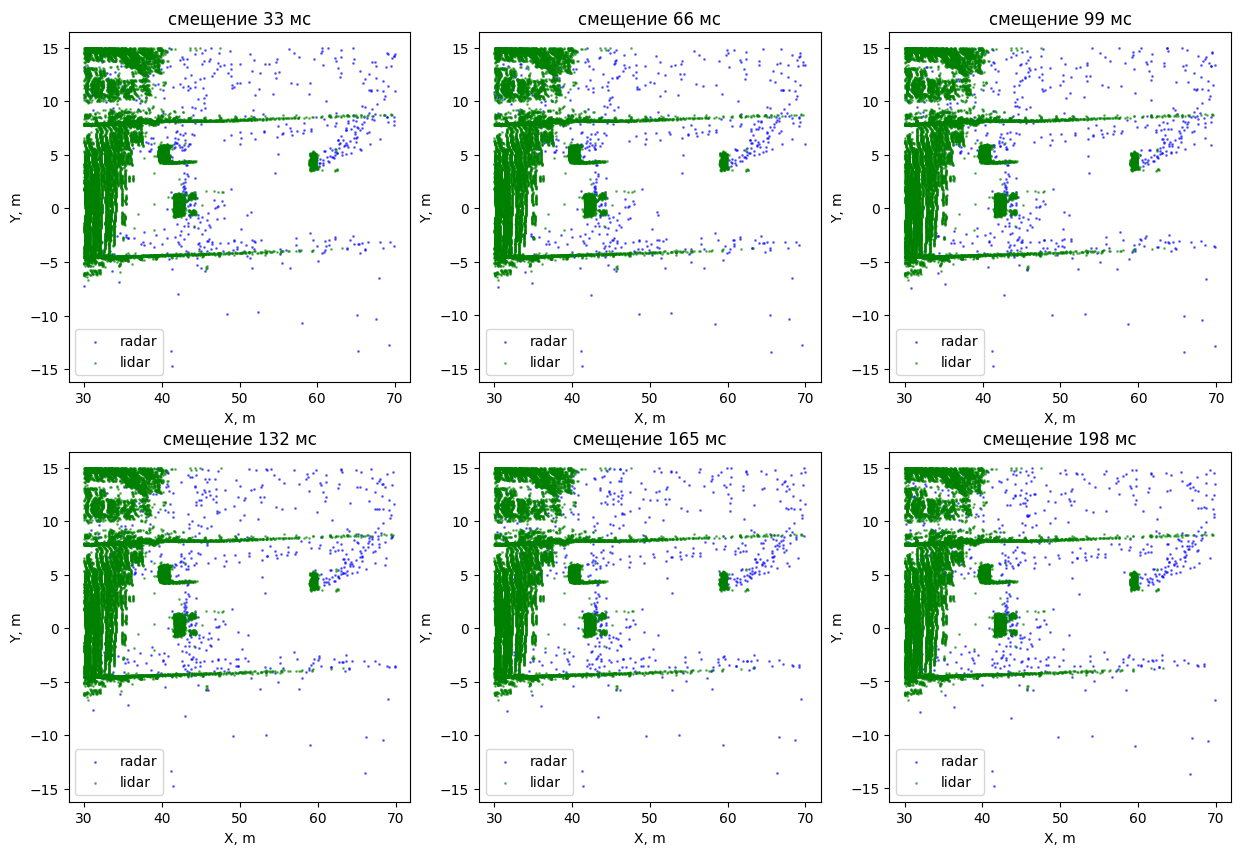

In [45]:
import matplotlib.pyplot as plt

change_withdelay(delta_t=0.2)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (a, b) in enumerate([(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]):
    radar_df = pd.read_csv("../data/processed data/radar_data_7.csv")
    lidar_df = pd.read_csv("../data/processed data/lidar_data_7.csv")
    axes[a, b].set_xlabel("X, m")
    axes[a, b].set_ylabel("Y, m")
    change_withdelay(delta_t=(0.033 * (i + 1)))
    axes[a, b].scatter(
        radar_df[
            (radar_df["QPDH0"] < 0.75)
            & (abs(radar_df["XwithDelta"] - 50) < 20)
            & (abs(radar_df["YwithDelta"]) < 15)
        ]["XwithDelta"],
        radar_df[
            (radar_df["QPDH0"] < 0.75)
            & (abs(radar_df["XwithDelta"] - 50) < 20)
            & (abs(radar_df["YwithDelta"]) < 15)
        ]["YwithDelta"],
        s=1,
        c="blue",
        alpha=0.5,
        label="radar",
    )
    axes[a, b].scatter(
        lidar_df[(abs(lidar_df["X, (m)"] - 50) < 20) & (abs(lidar_df["Y, (m)"]) < 15)][
            "X, (m)"
        ],
        lidar_df[(abs(lidar_df["X, (m)"] - 50) < 20) & (abs(lidar_df["Y, (m)"]) < 15)][
            "Y, (m)"
        ],
        s=1,
        c="green",
        alpha=0.5,
        label="lidar",
    )

    axes[a, b].set_title(f"смещение {i * 33 + 33} мс")
    axes[a, b].legend()

/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29341/785014120.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 10))


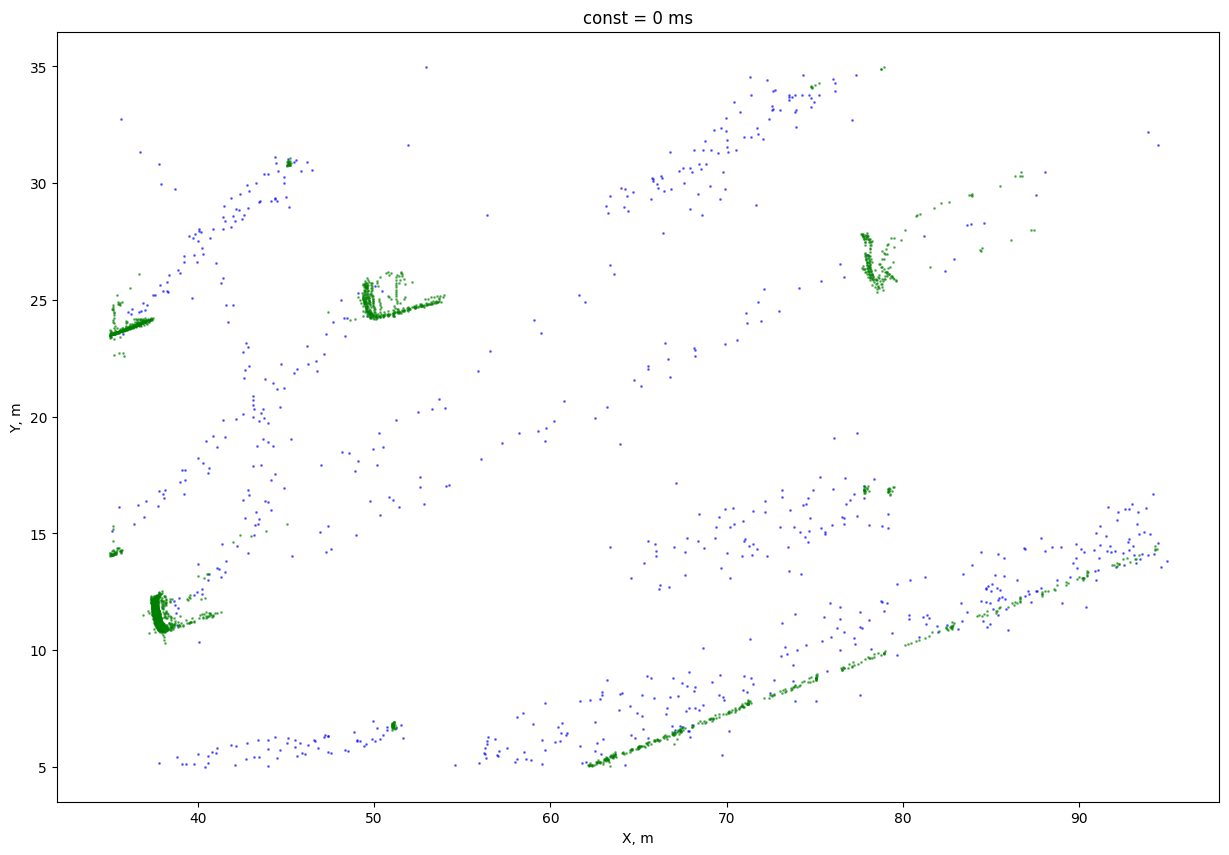

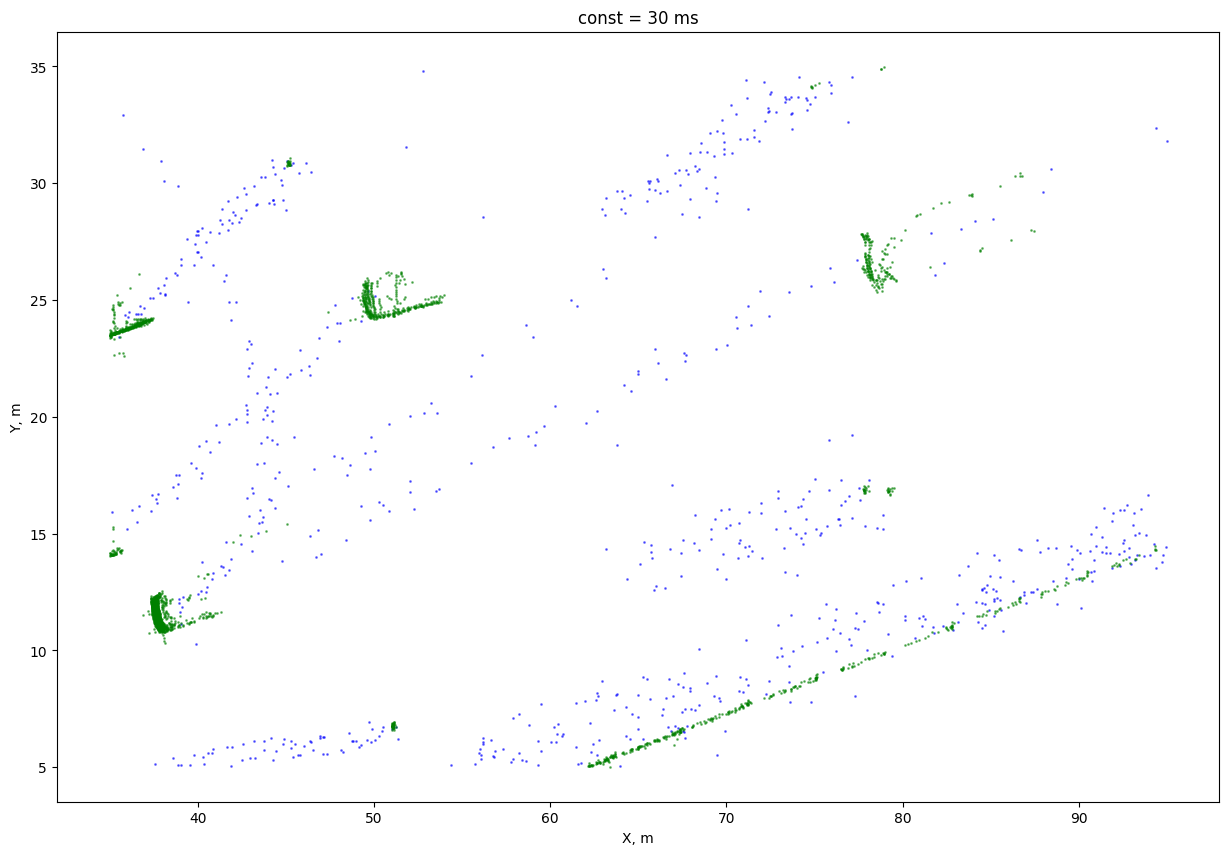

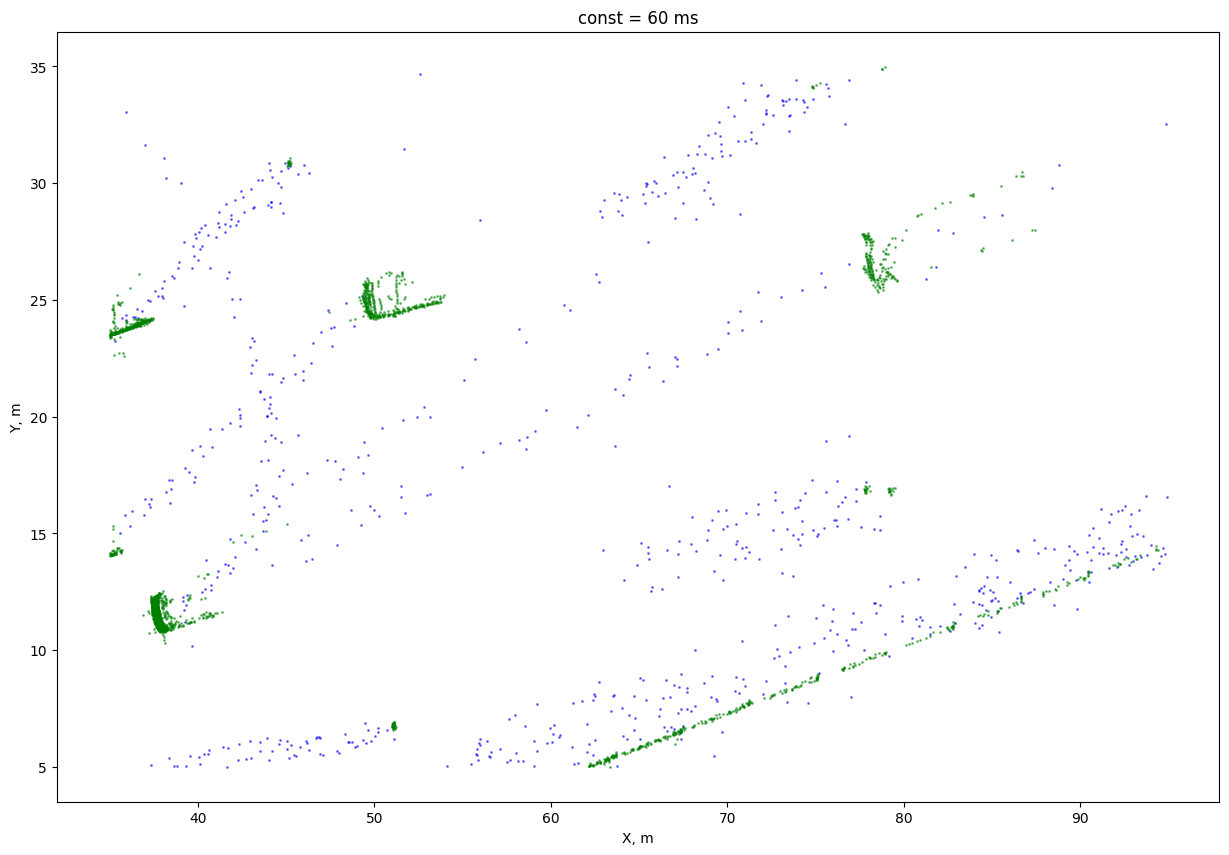

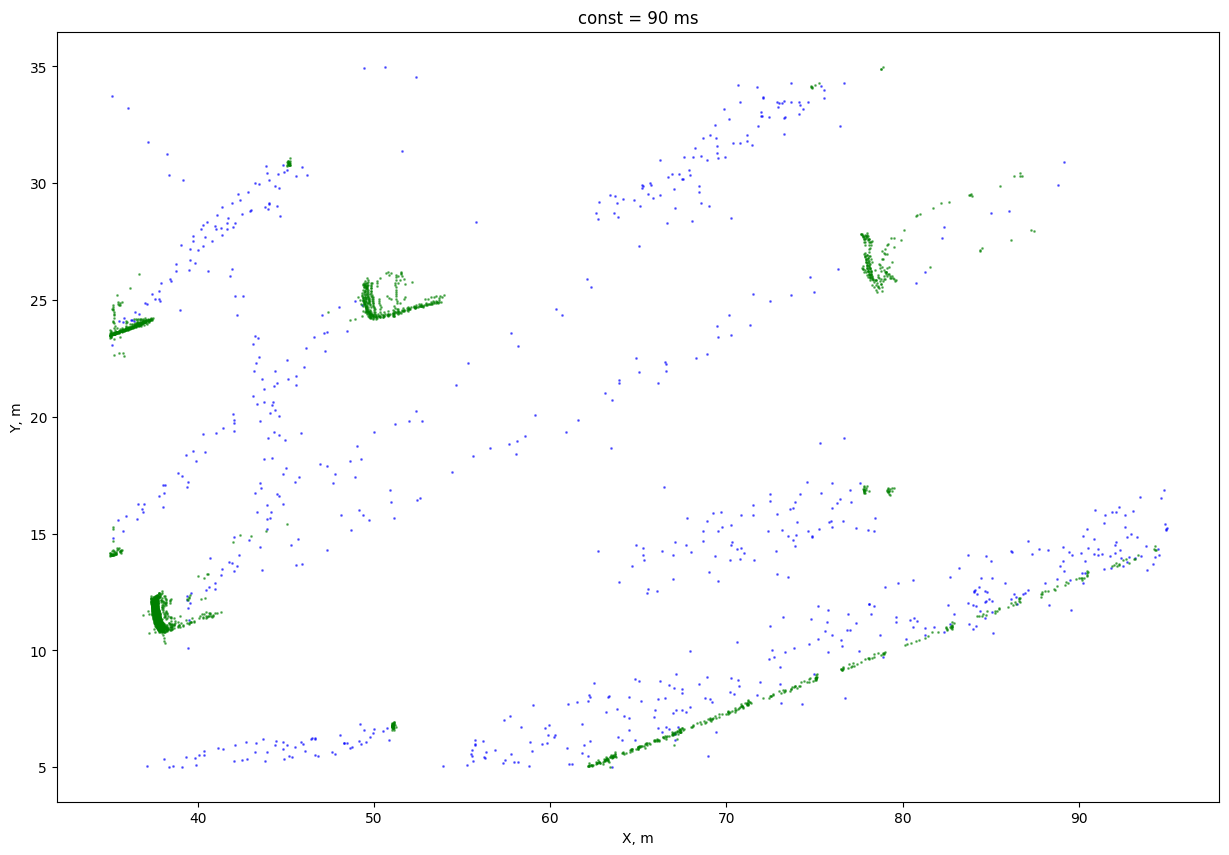

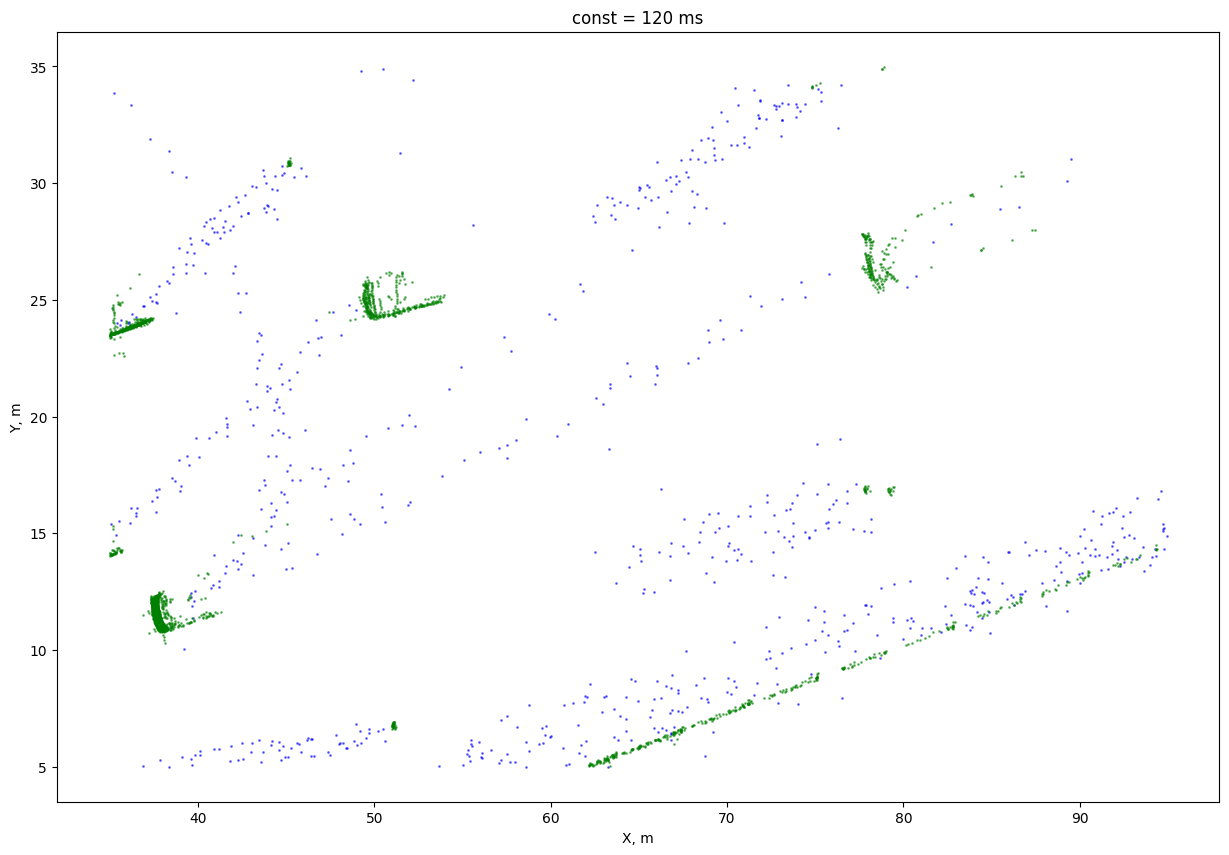

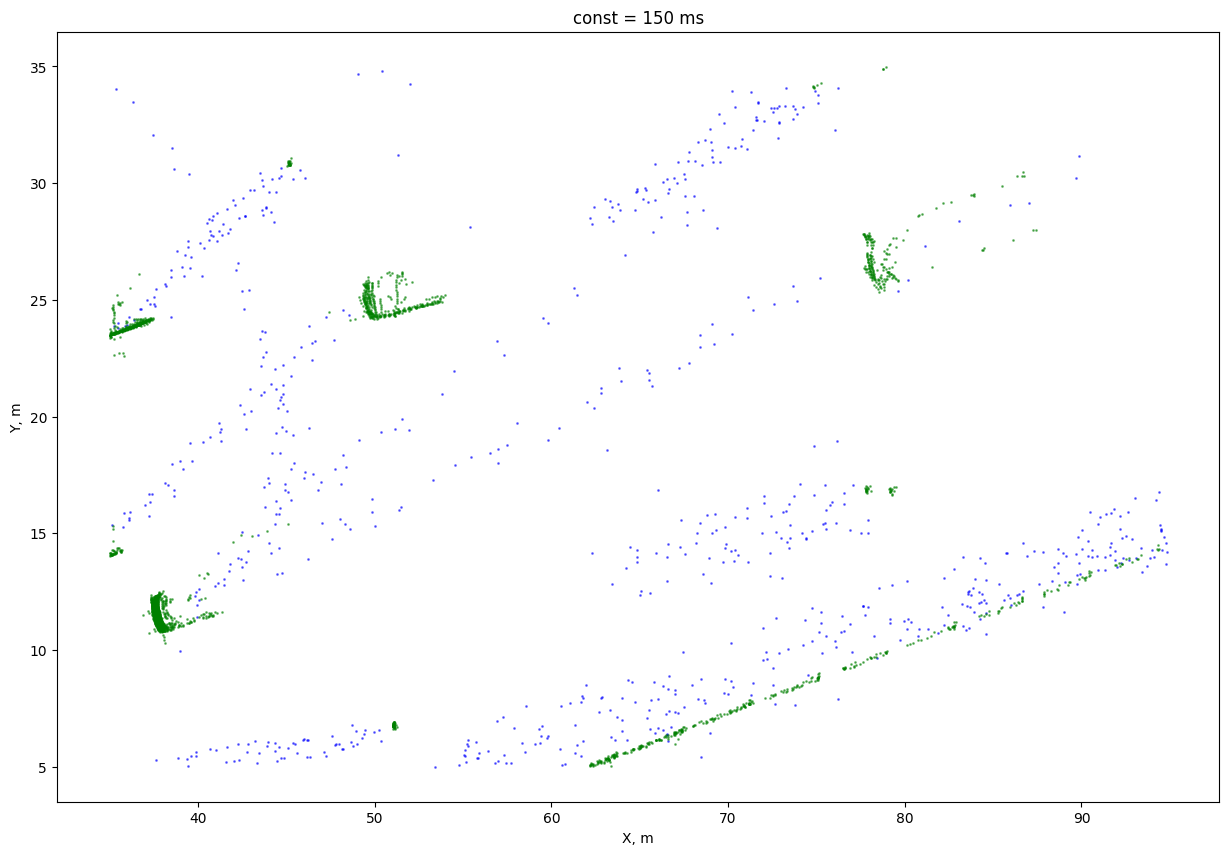

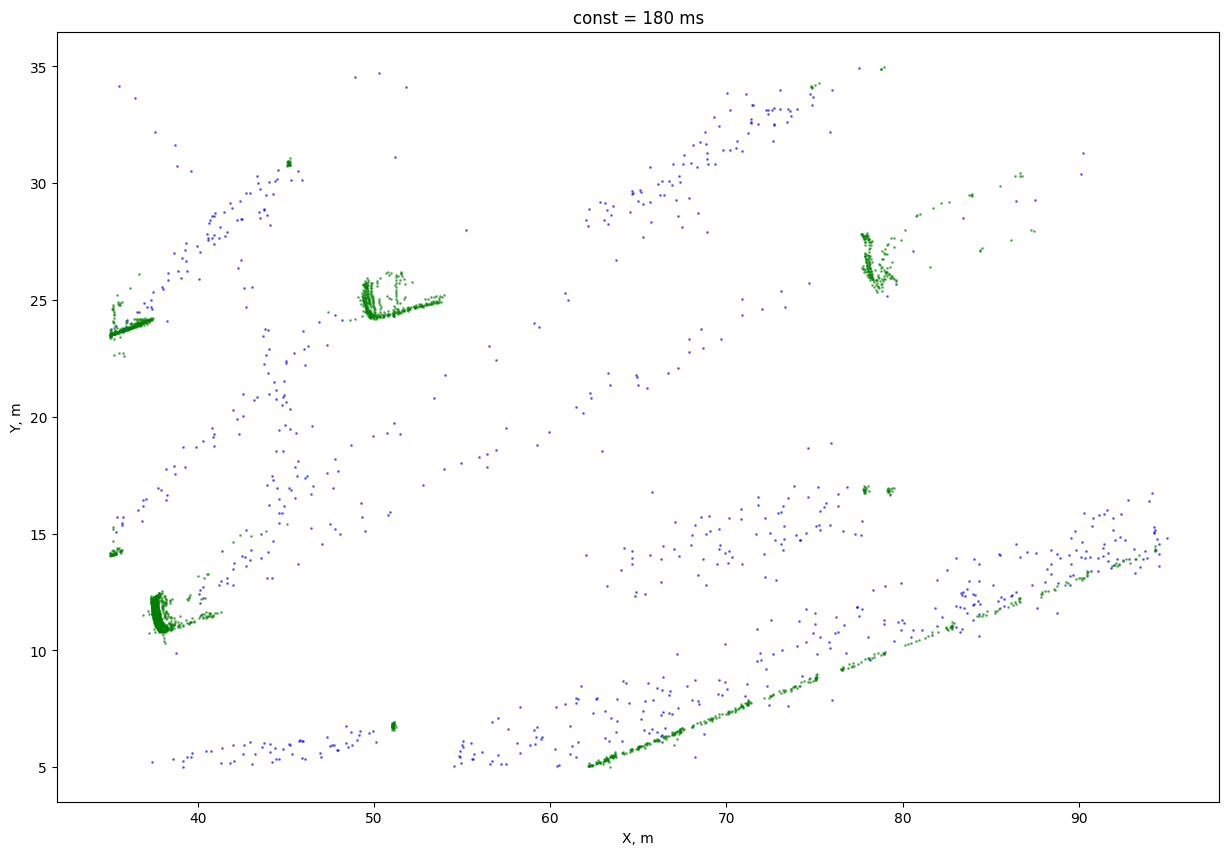

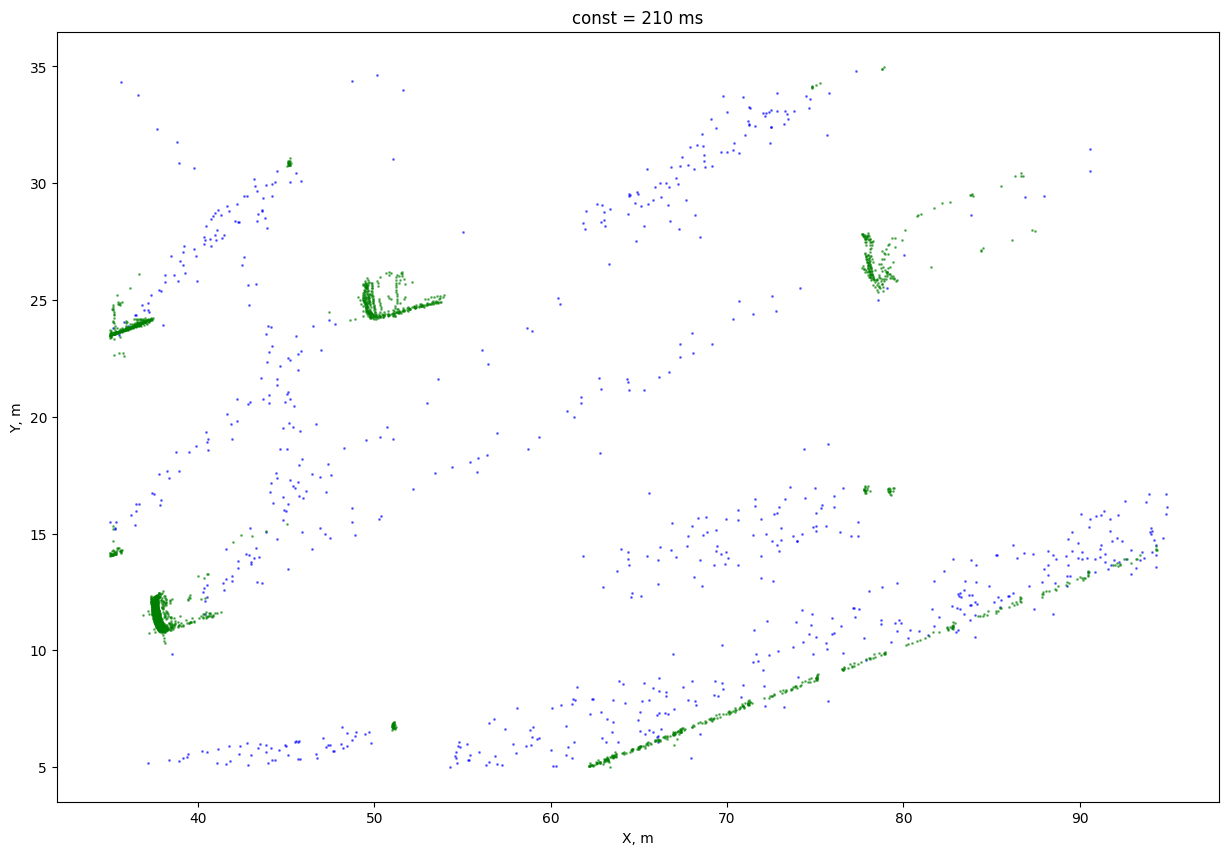

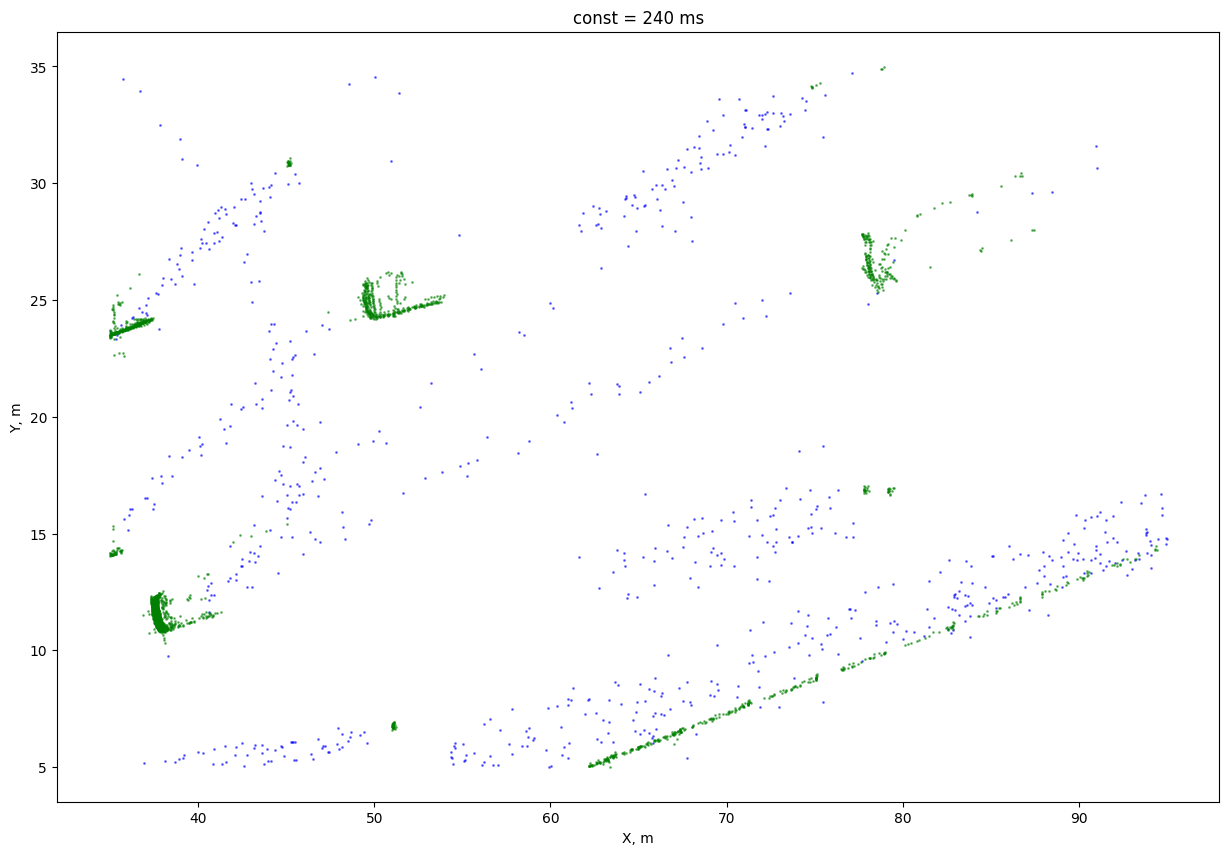

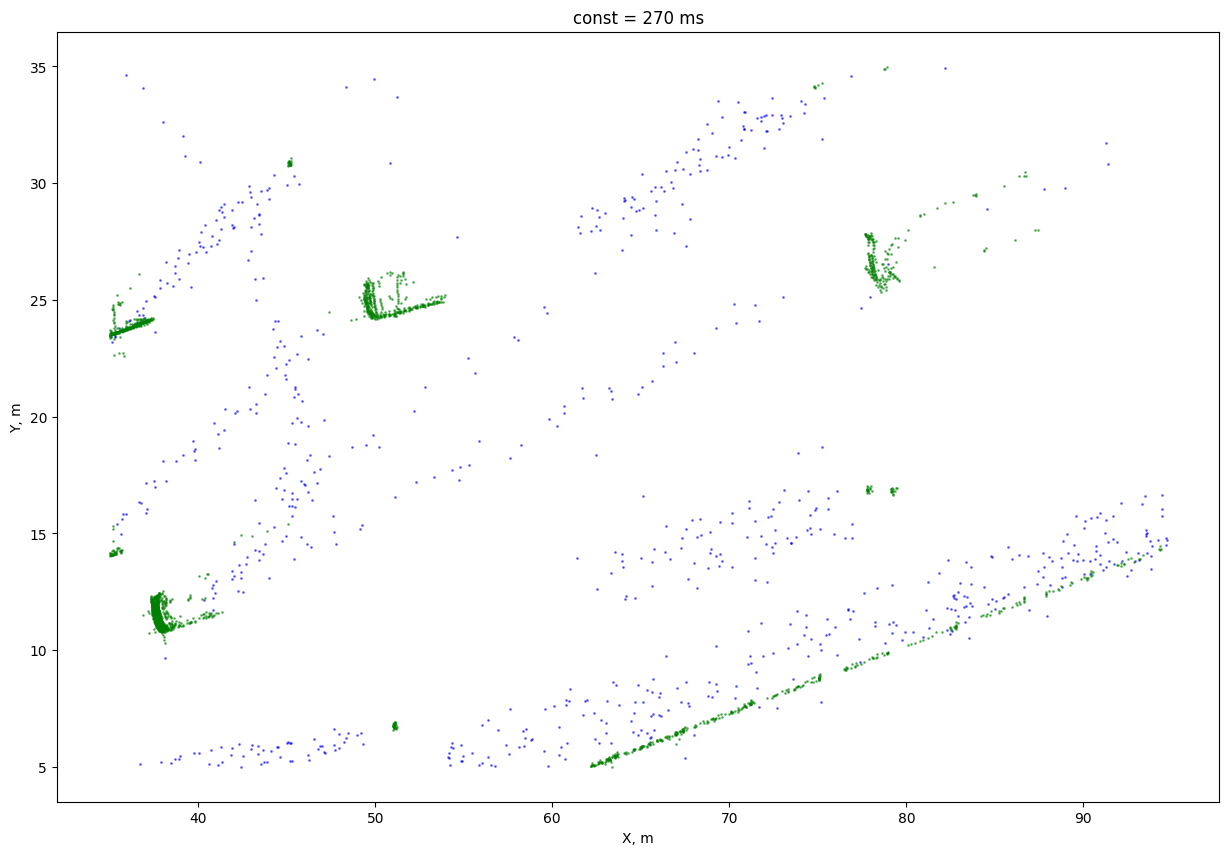

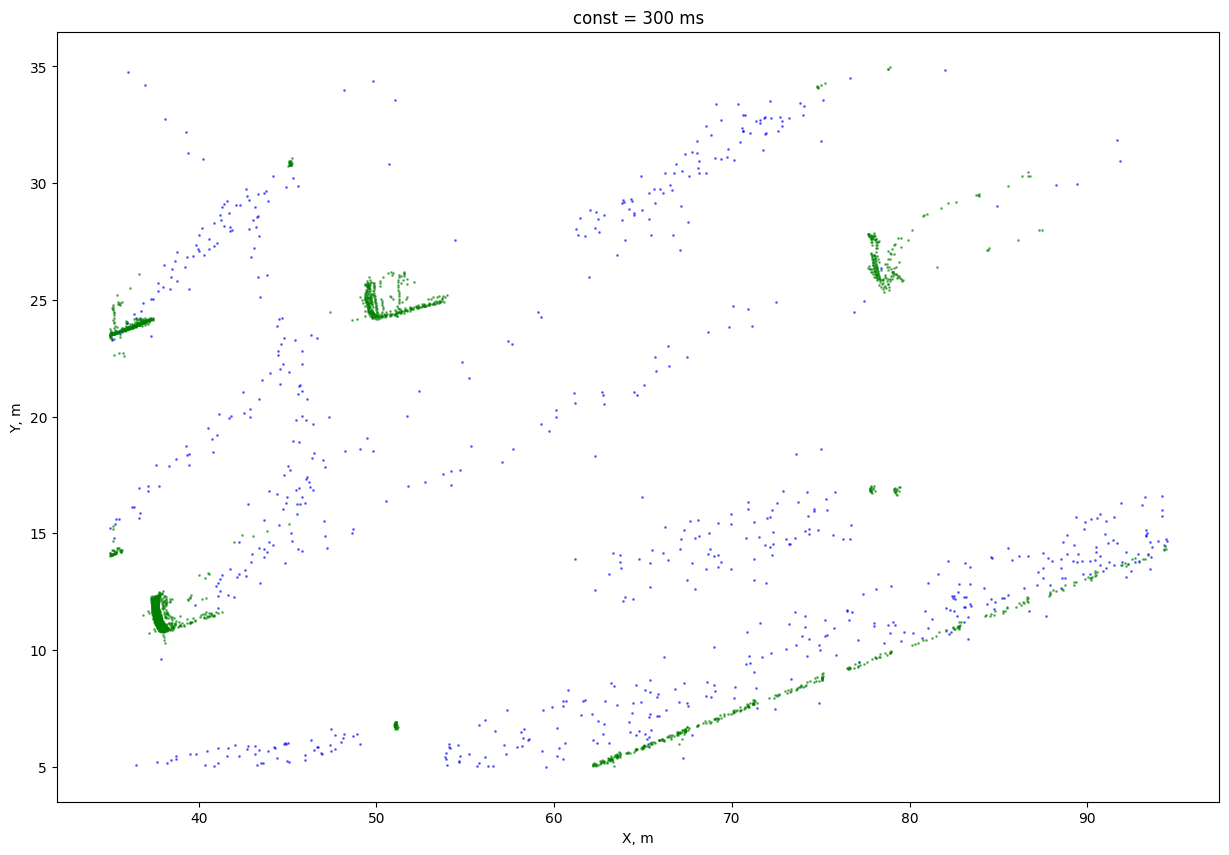

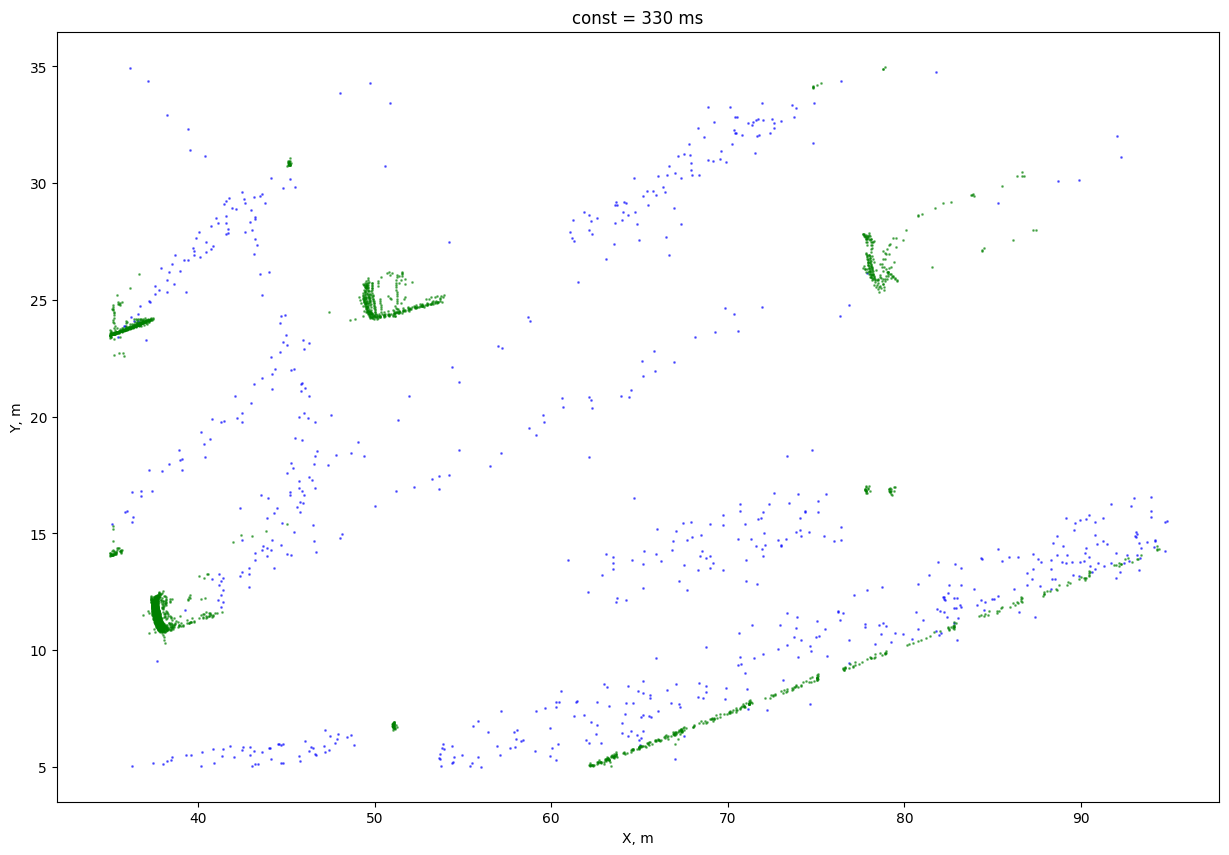

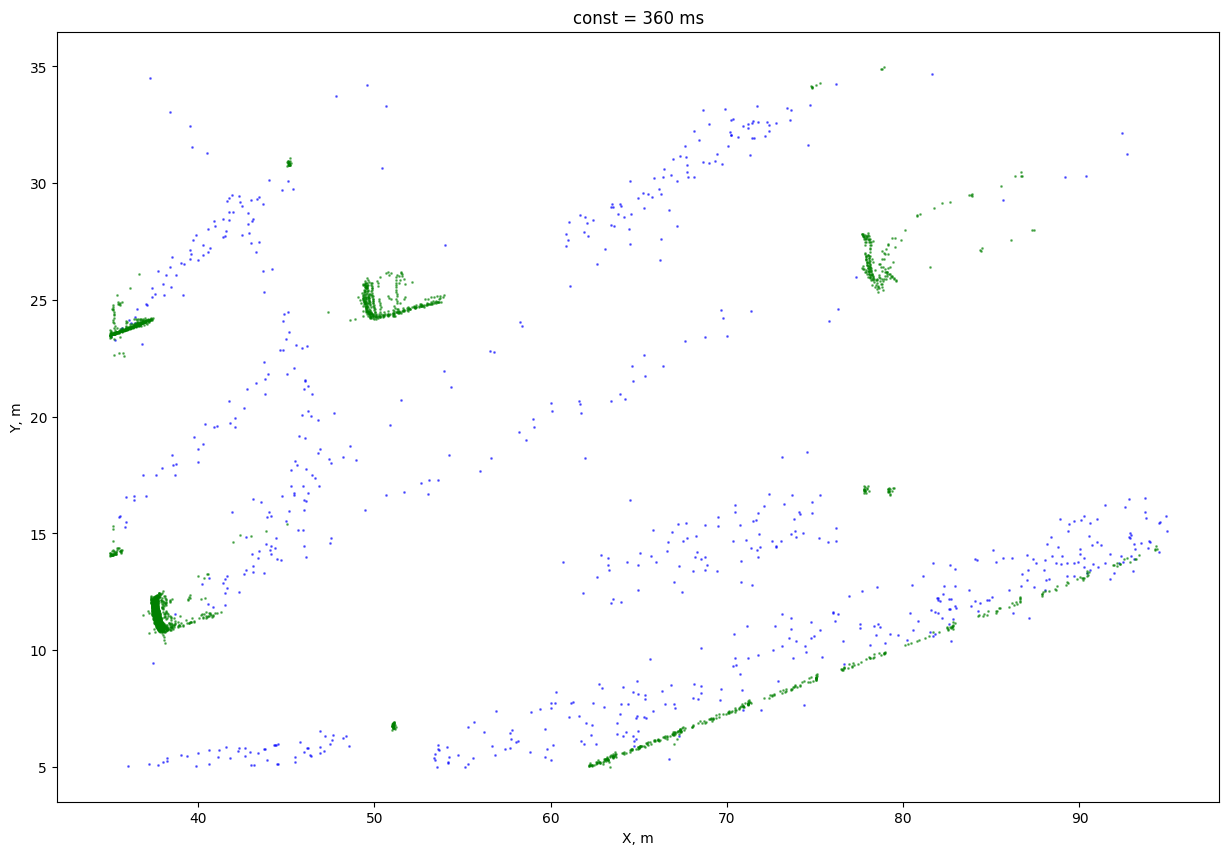

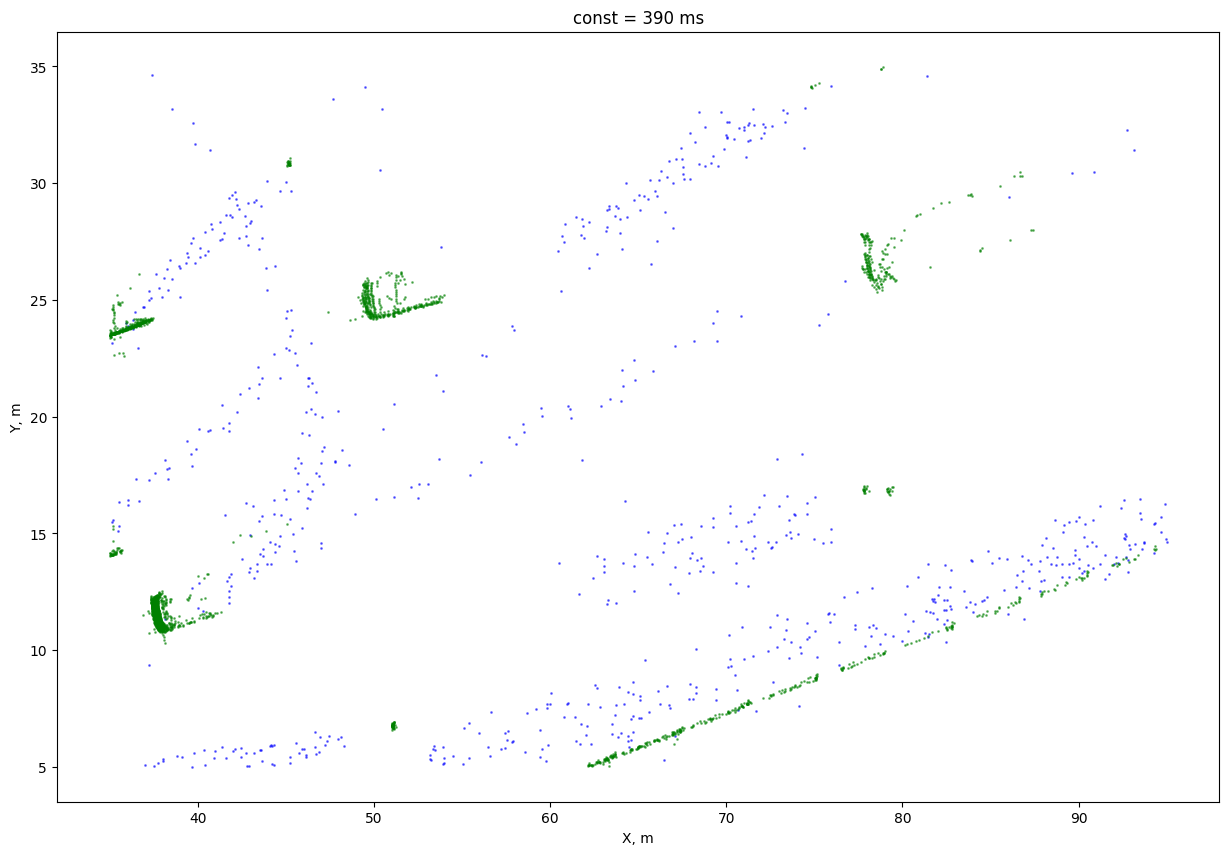

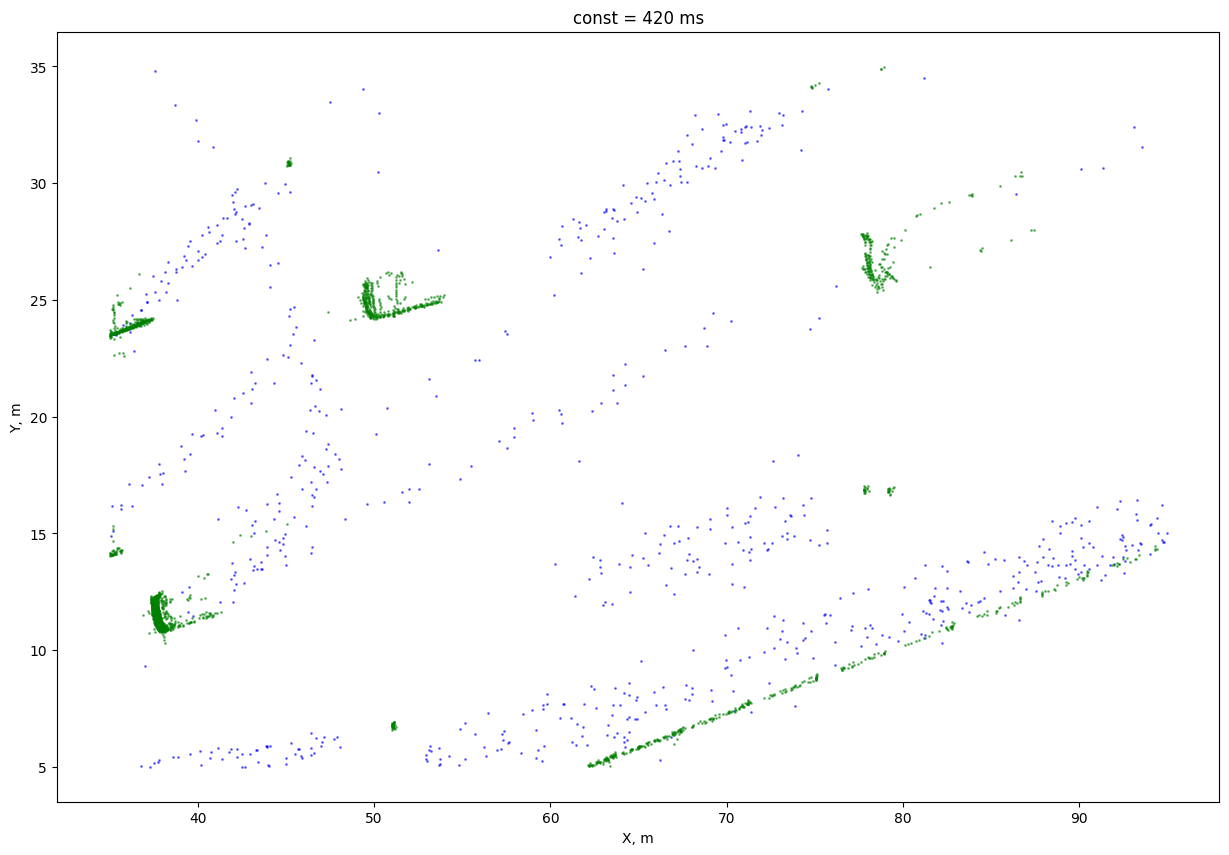

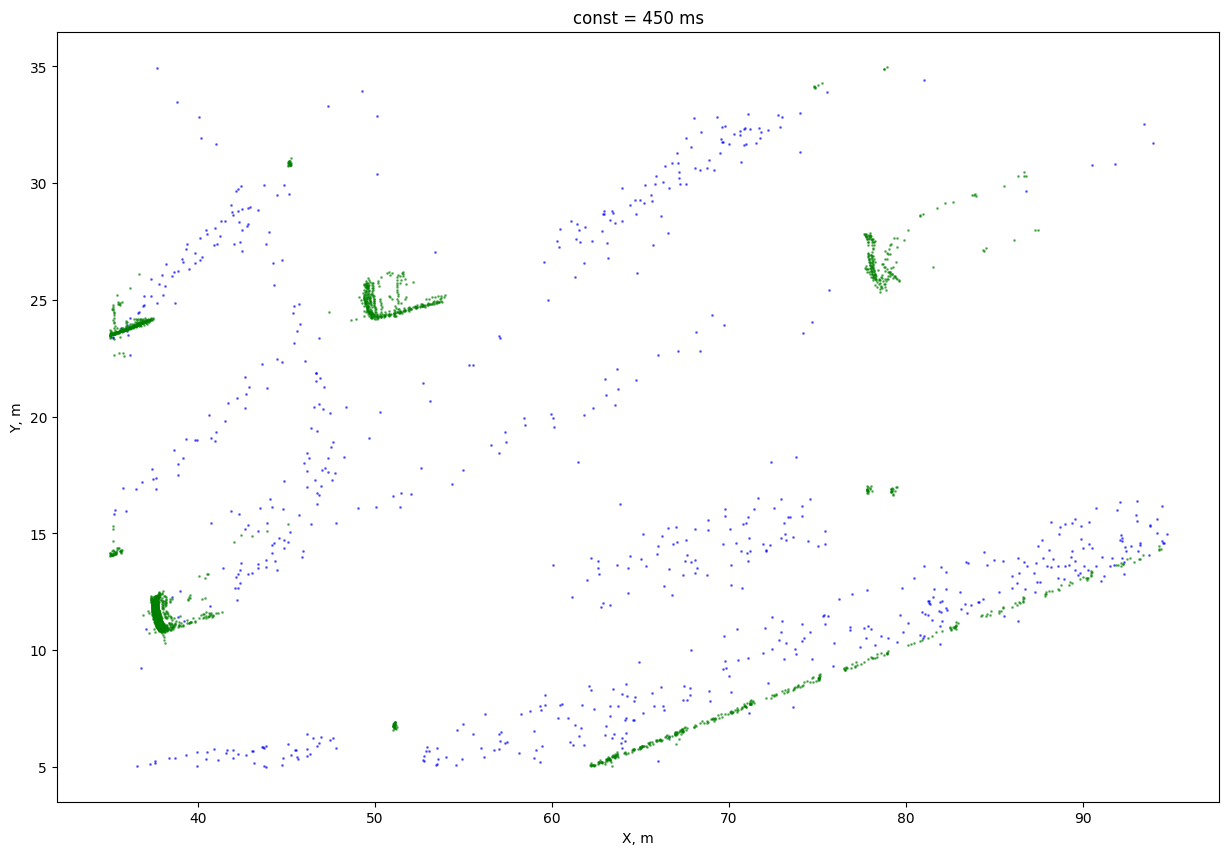

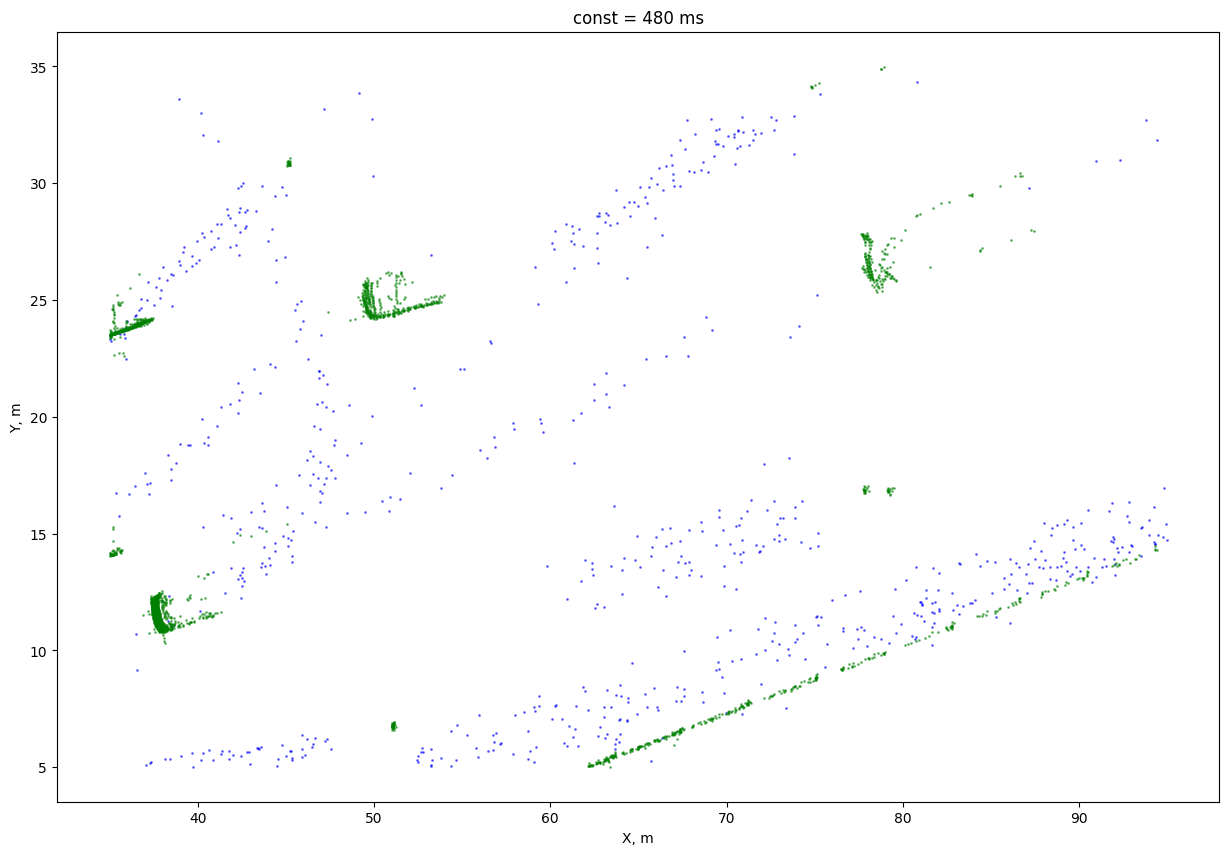

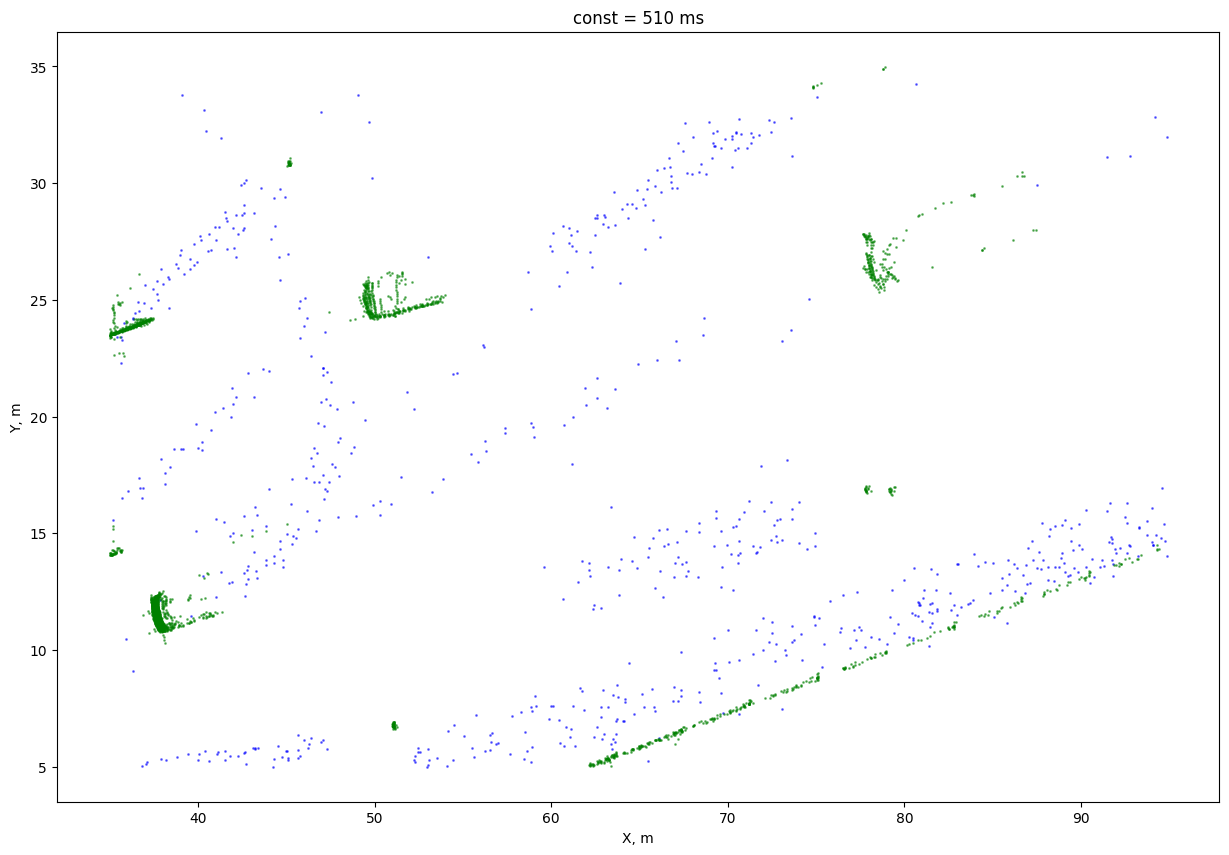

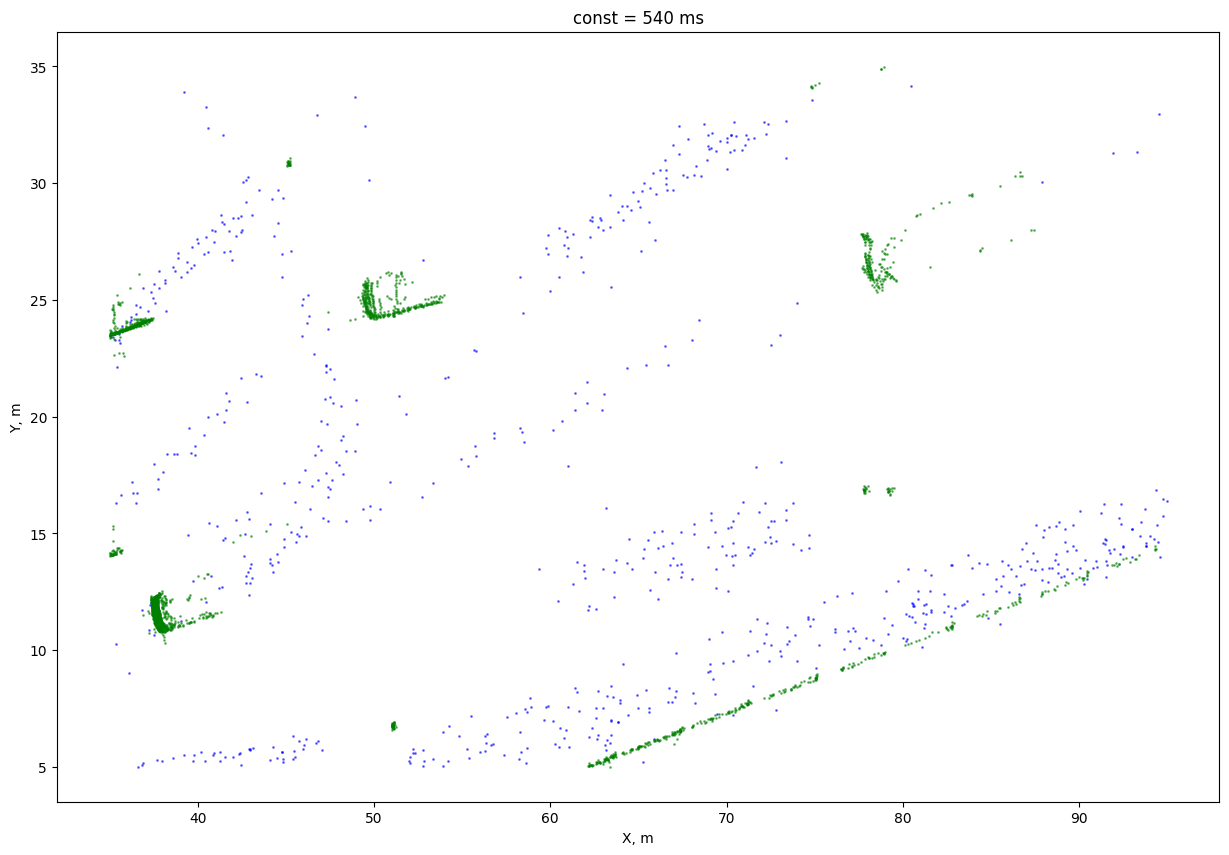

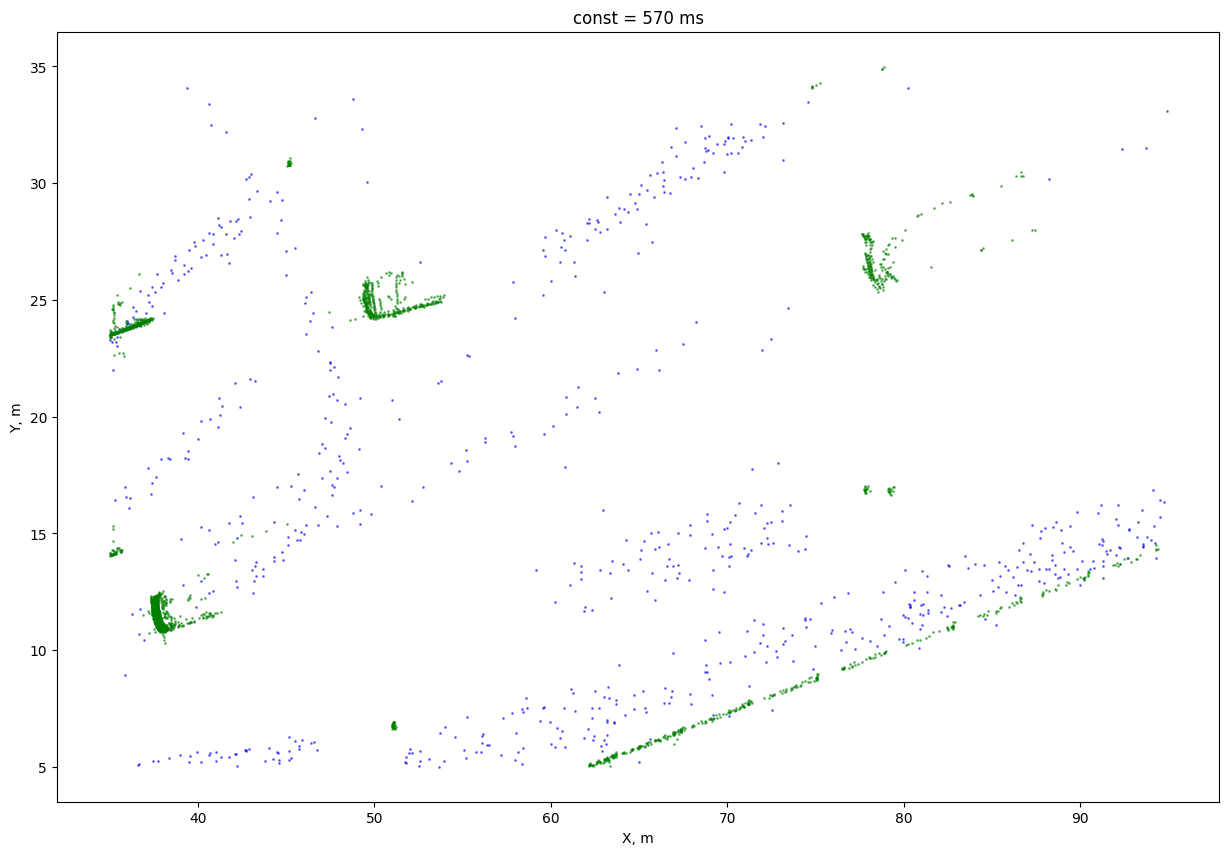

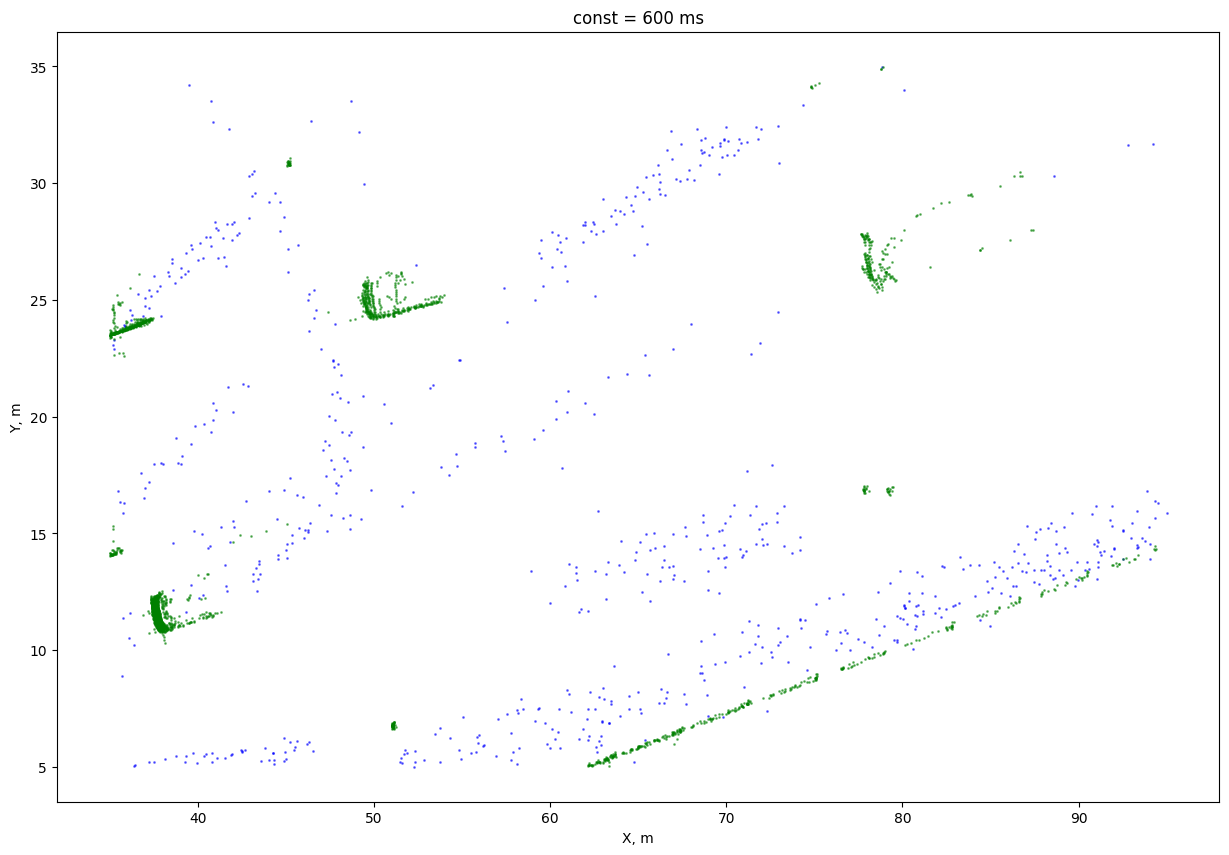

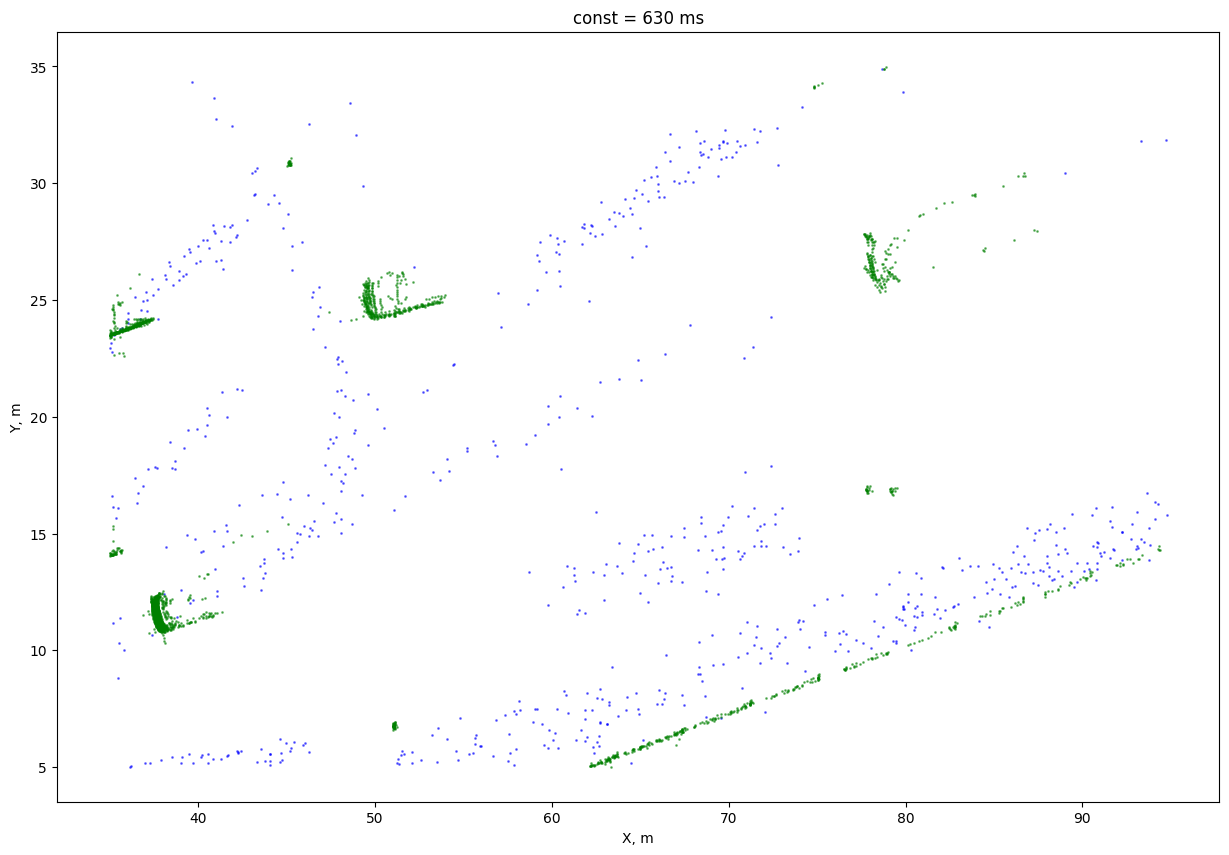

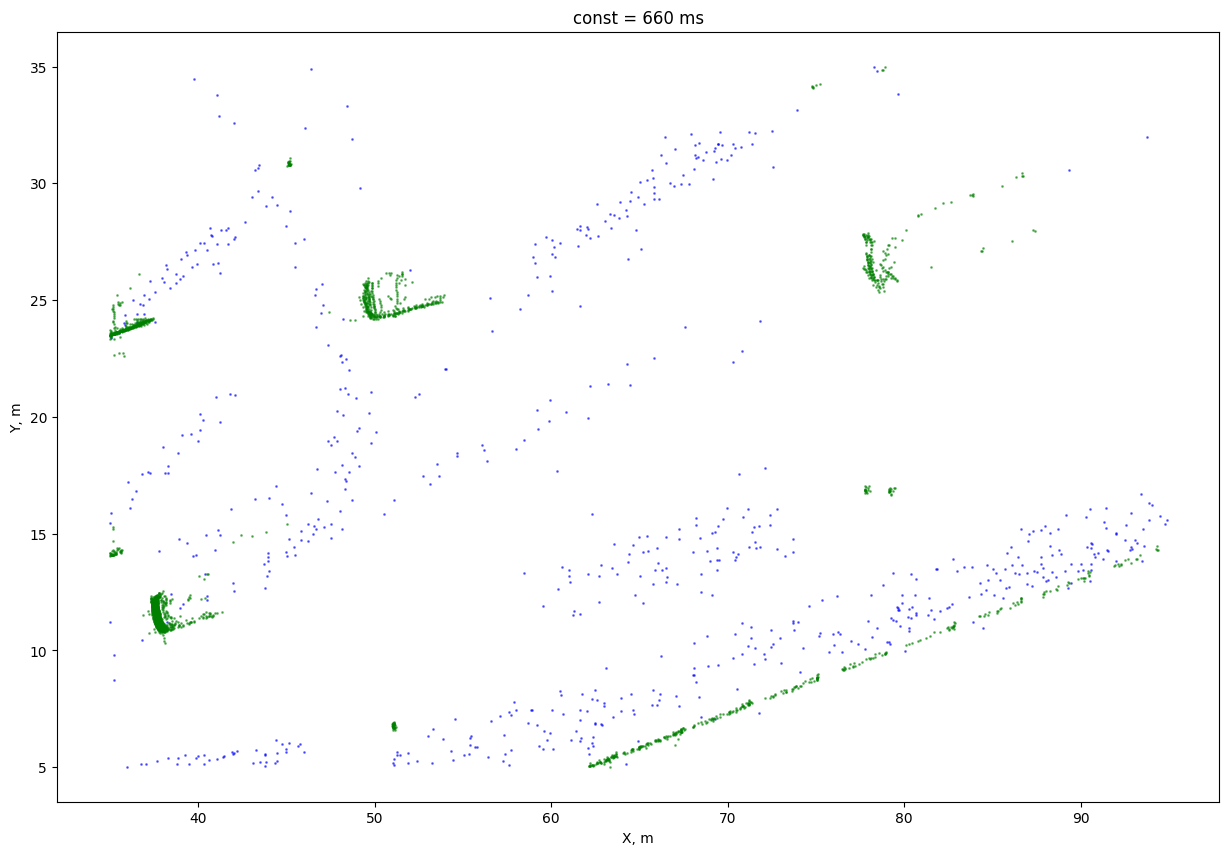

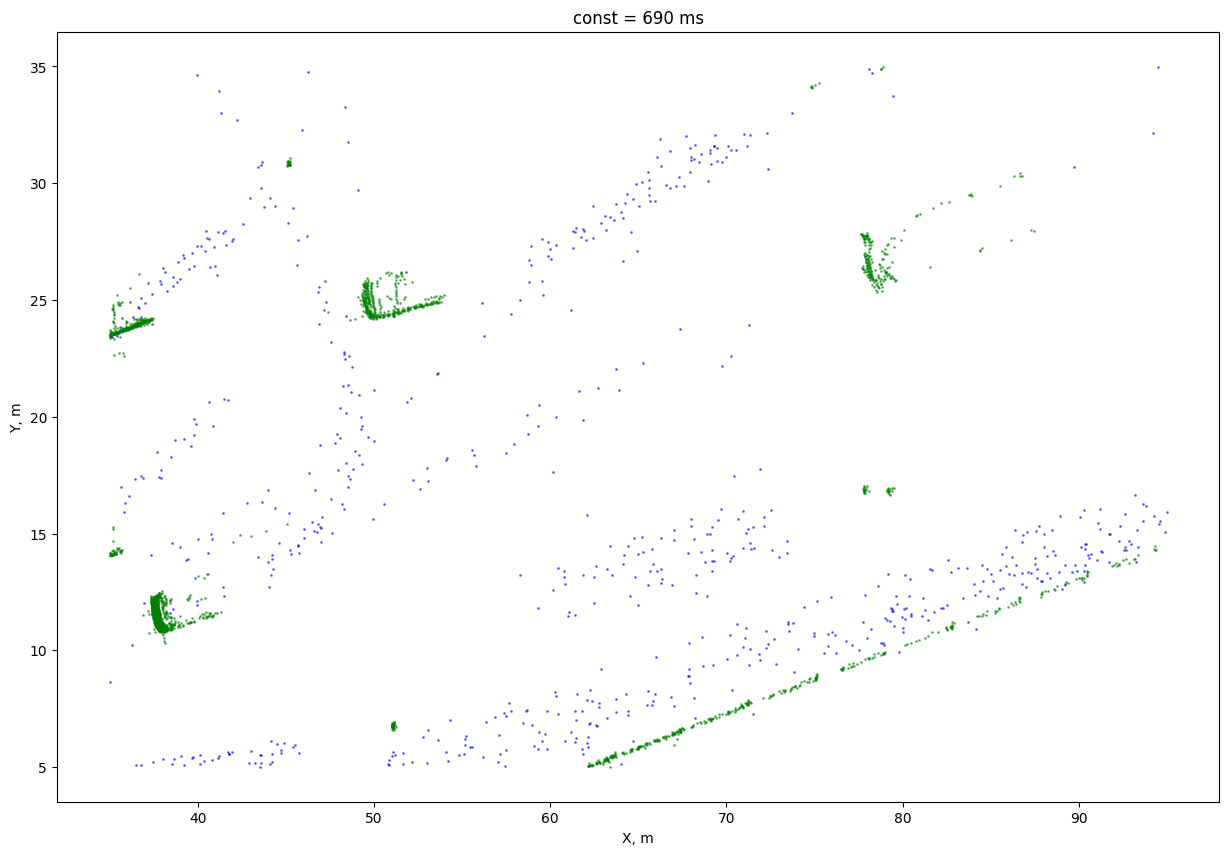

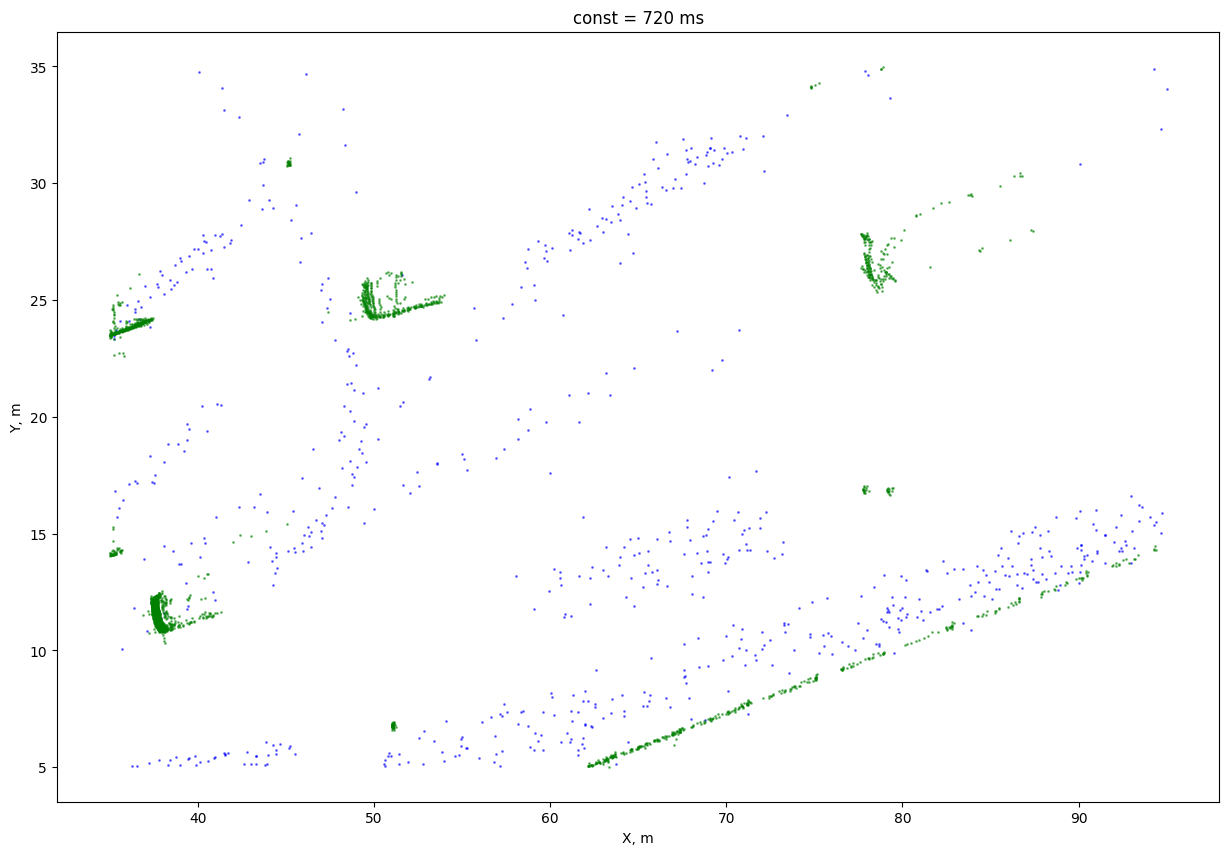

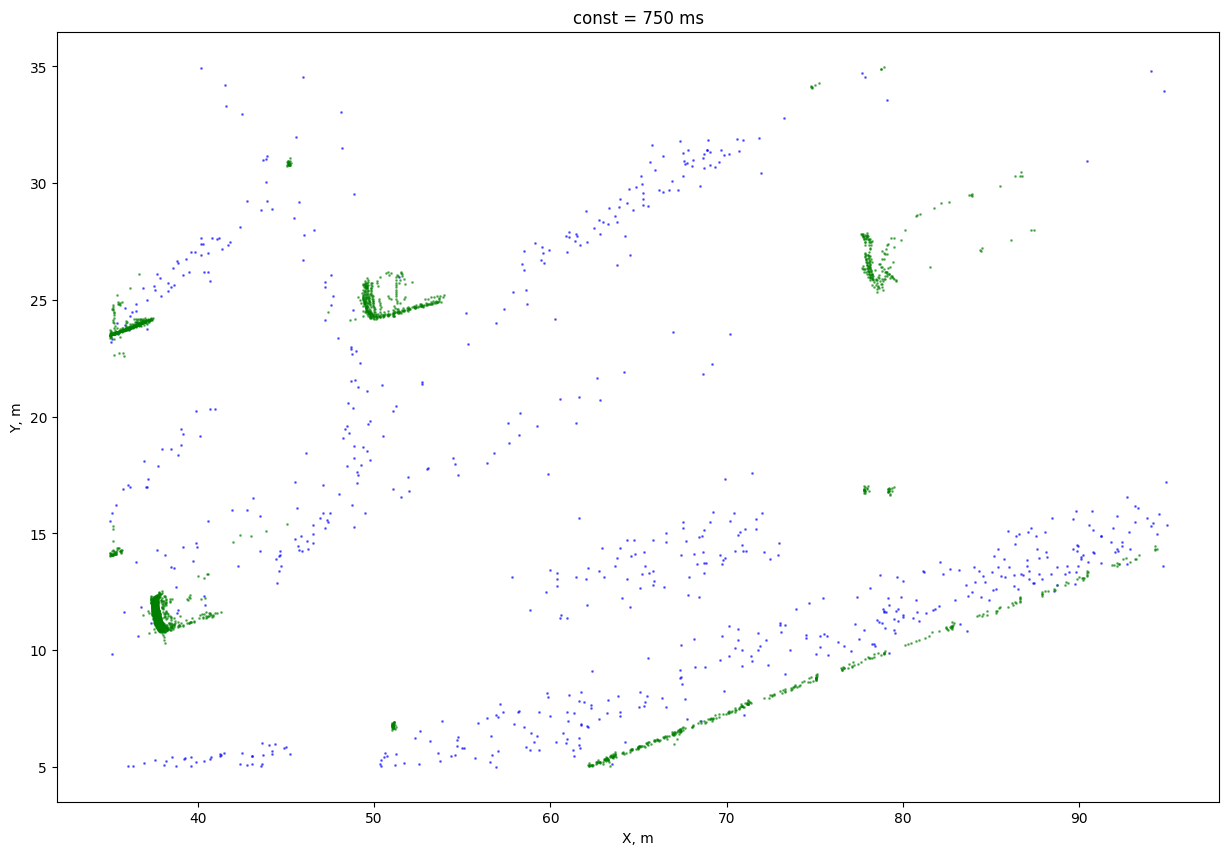

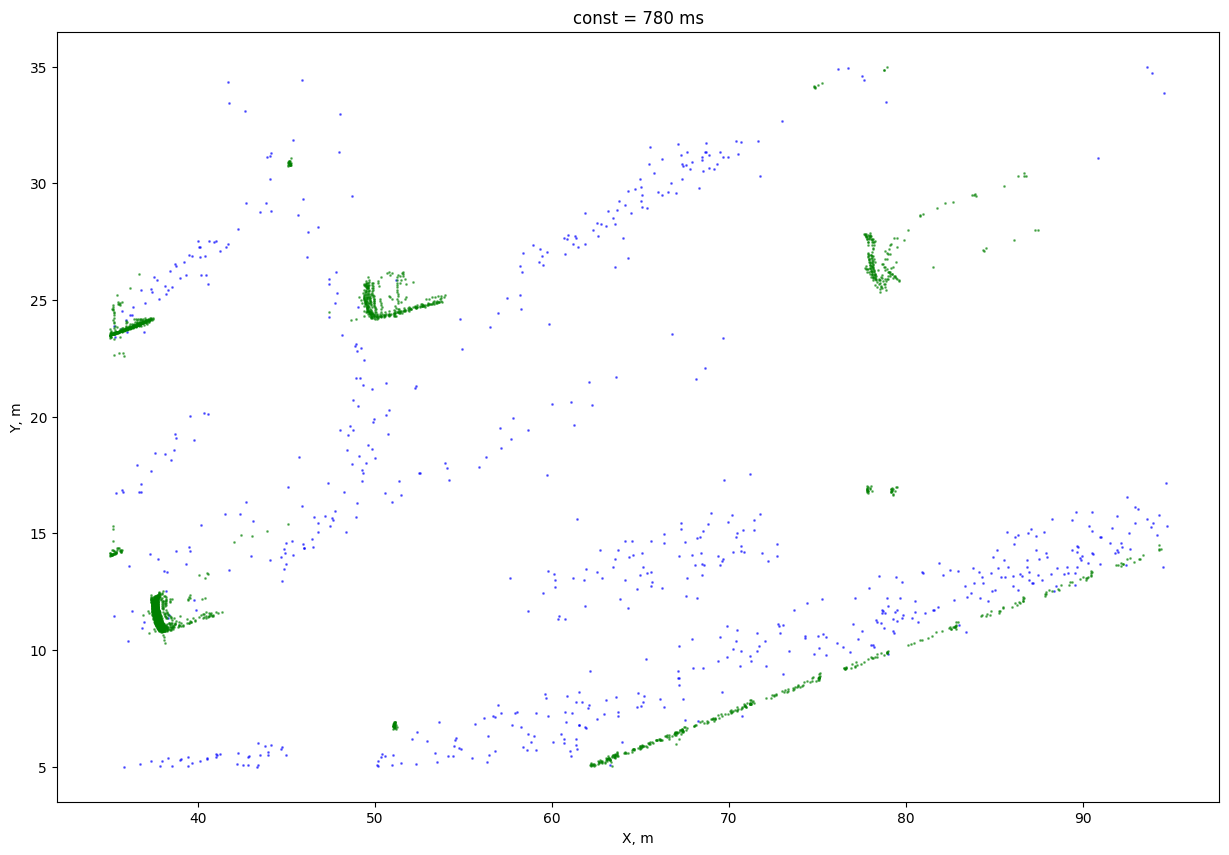

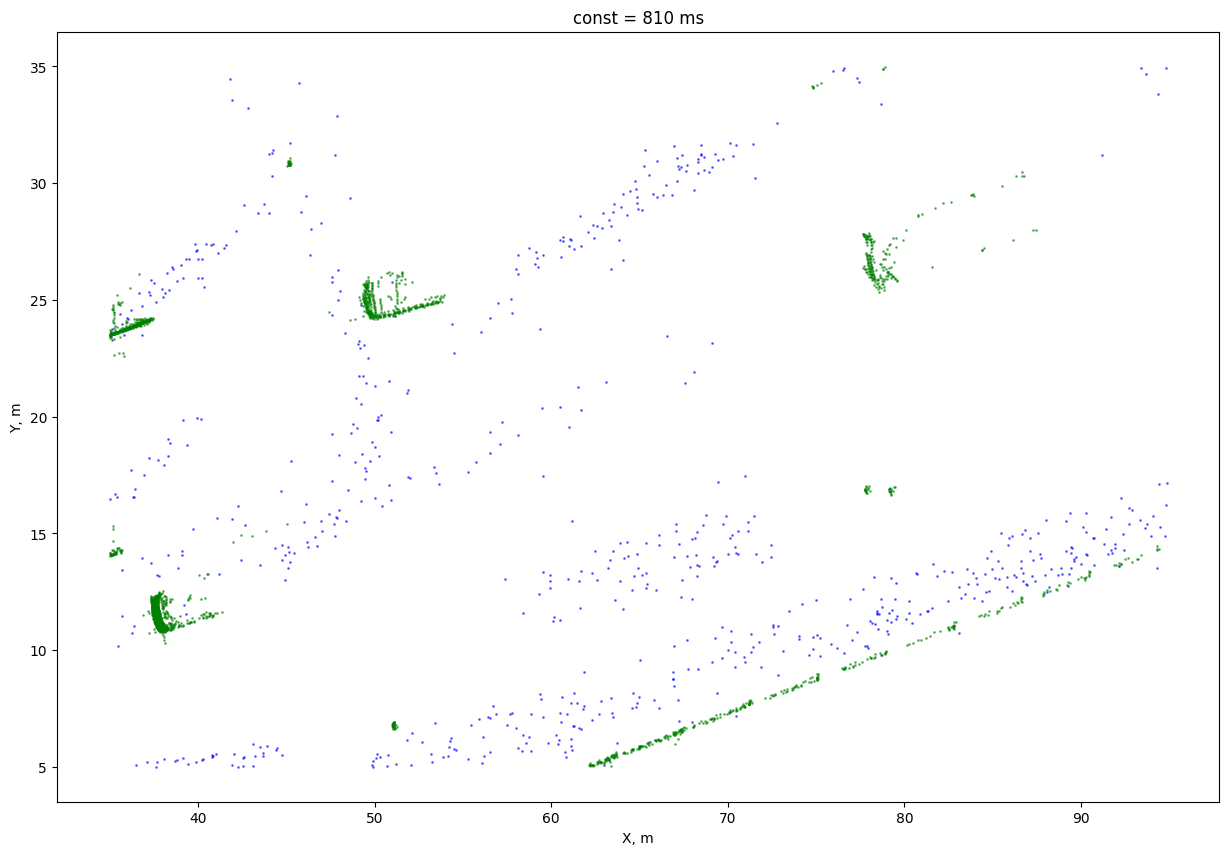

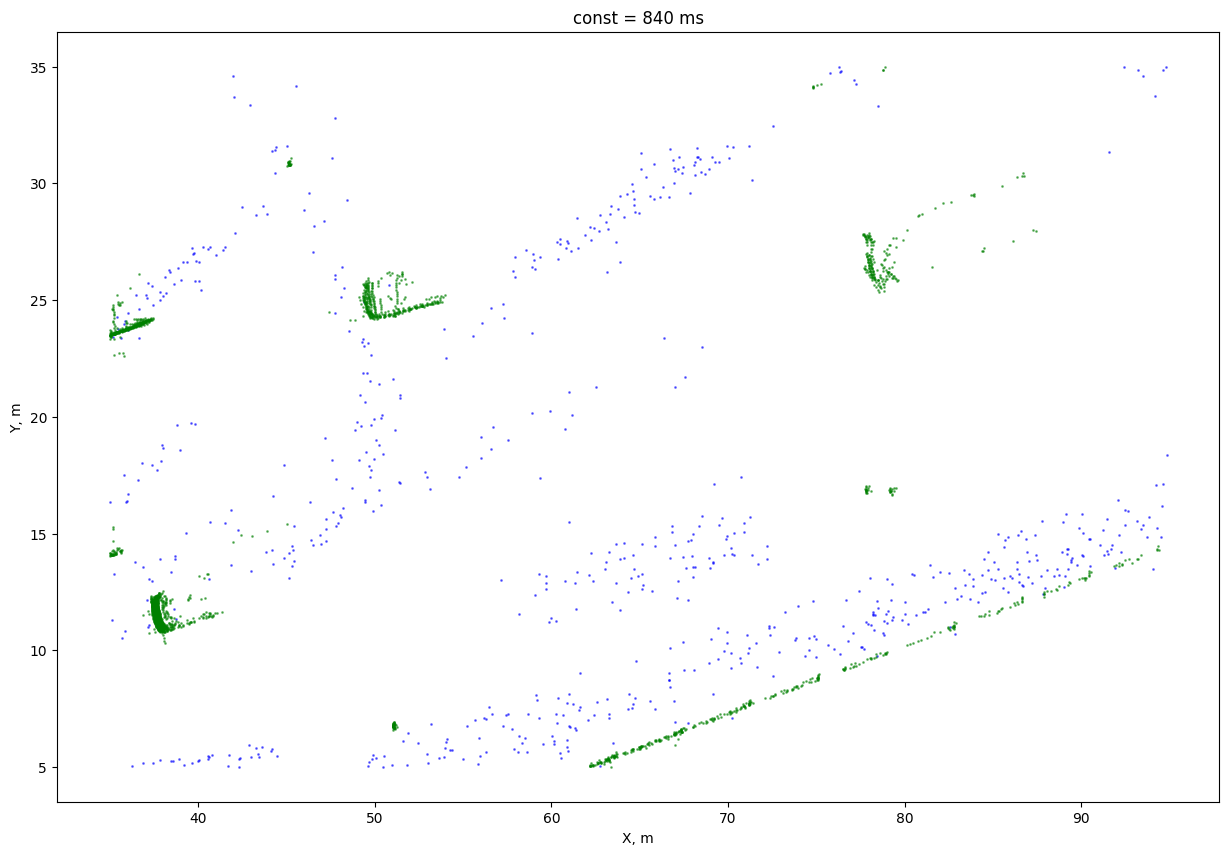

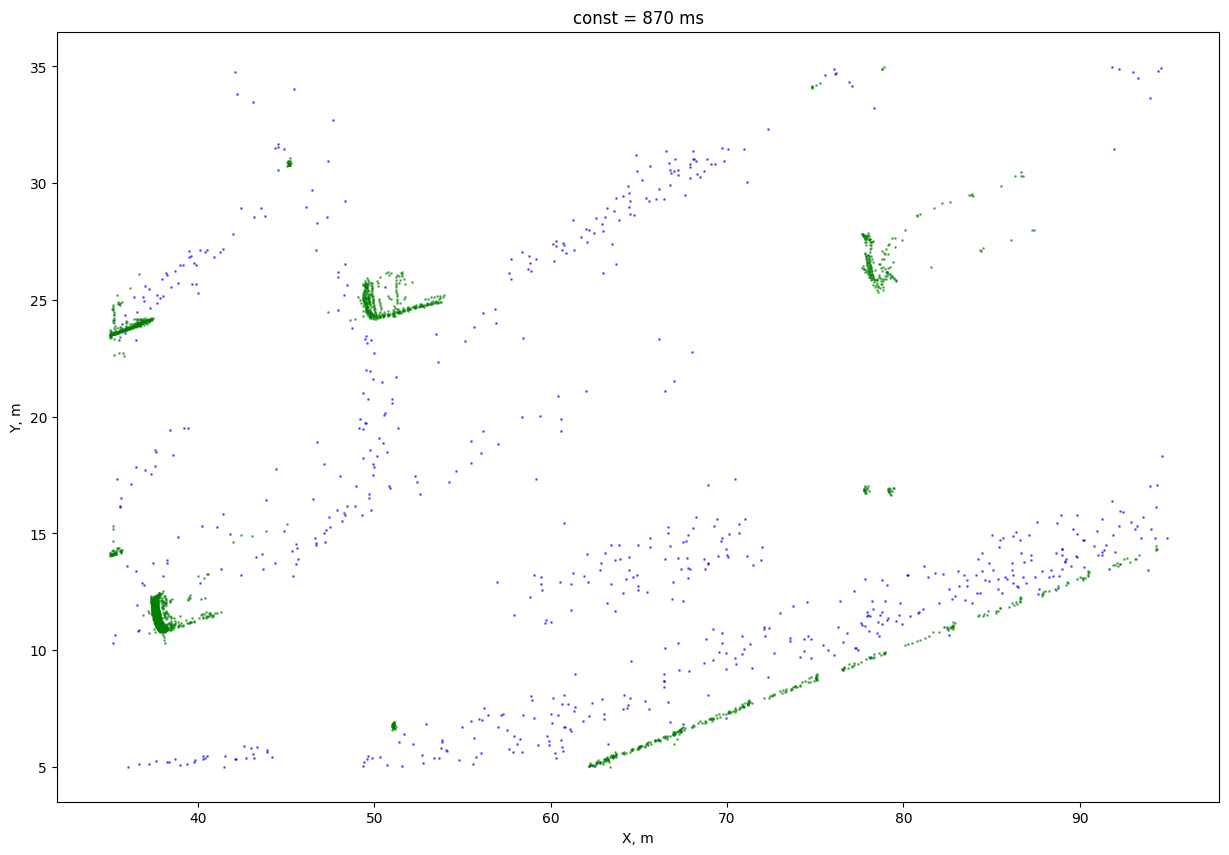

In [46]:
for i in range(30):
    radar_df = pd.read_csv("../data/processed data/radar_data_0.csv")
    lidar_df = pd.read_csv("../data/processed data/lidar_data_0.csv")
    change_withdelay(delta_t=(i / 30))
    plt.figure(figsize=(15, 10))
    plt.xlabel("X, m")
    plt.ylabel("Y, m")
    plt.title(f"const = {i*30} ms")
    plt.scatter(
        radar_df[
            (radar_df["QPDH0"] < 0.75)
            & (abs(radar_df["XwithDelta"] - 65) < 30)
            & (abs(radar_df["YwithDelta"] - 20) < 15)
        ]["XwithDelta"],
        radar_df[
            (radar_df["QPDH0"] < 0.75)
            & (abs(radar_df["XwithDelta"] - 65) < 30)
            & (abs(radar_df["YwithDelta"] - 20) < 15)
        ]["YwithDelta"],
        s=1,
        c="blue",
        alpha=0.5,
        label="radar",
    )
    plt.scatter(
        lidar_df[
            (abs(lidar_df["X, (m)"] - 65) < 30) & (abs(lidar_df["Y, (m)"] - 20) < 15)
        ]["X, (m)"],
        lidar_df[
            (abs(lidar_df["X, (m)"] - 65) < 30) & (abs(lidar_df["Y, (m)"] - 20) < 15)
        ]["Y, (m)"],
        s=1,
        c="green",
        alpha=0.5,
        label="lidar",
    )
    plt.savefig(f"../data/garbage/asd_{i}.png")

In [47]:
import glob
from PIL import Image


def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save(
        "my_awesome.gif",
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=100,
        loop=0,
    )


if __name__ == "__main__":
    make_gif("../data/garbage")